df shape: (15_028, 10)
┌────────────┬───────┬──────┬───────────┬───┬───────────┬────────────┬──────────────┬──────────────┐
│ model      ┆ split ┆ step ┆ reward    ┆ … ┆ logs      ┆ metric_win ┆ metric_compl ┆ metric_num_m │
│ ---        ┆ ---   ┆ ---  ┆ ---       ┆   ┆ ---       ┆ ---        ┆ etion_tokens ┆ oves         │
│ str        ┆ str   ┆ i64  ┆ f64       ┆   ┆ list[str] ┆ f64        ┆ ---          ┆ ---          │
│            ┆       ┆      ┆           ┆   ┆           ┆            ┆ f64          ┆ f64          │
╞════════════╪═══════╪══════╪═══════════╪═══╪═══════════╪════════════╪══════════════╪══════════════╡
│ 009        ┆ train ┆ 0    ┆ -1.0      ┆ … ┆ []        ┆ null       ┆ 3.0          ┆ null         │
│ 009        ┆ train ┆ 0    ┆ -1.0      ┆ … ┆ []        ┆ null       ┆ 3.0          ┆ null         │
│ 009        ┆ train ┆ 0    ┆ -1.0      ┆ … ┆ []        ┆ null       ┆ 3.0          ┆ null         │
│ 009        ┆ train ┆ 0    ┆ -1.0      ┆ … ┆ []        ┆ null      

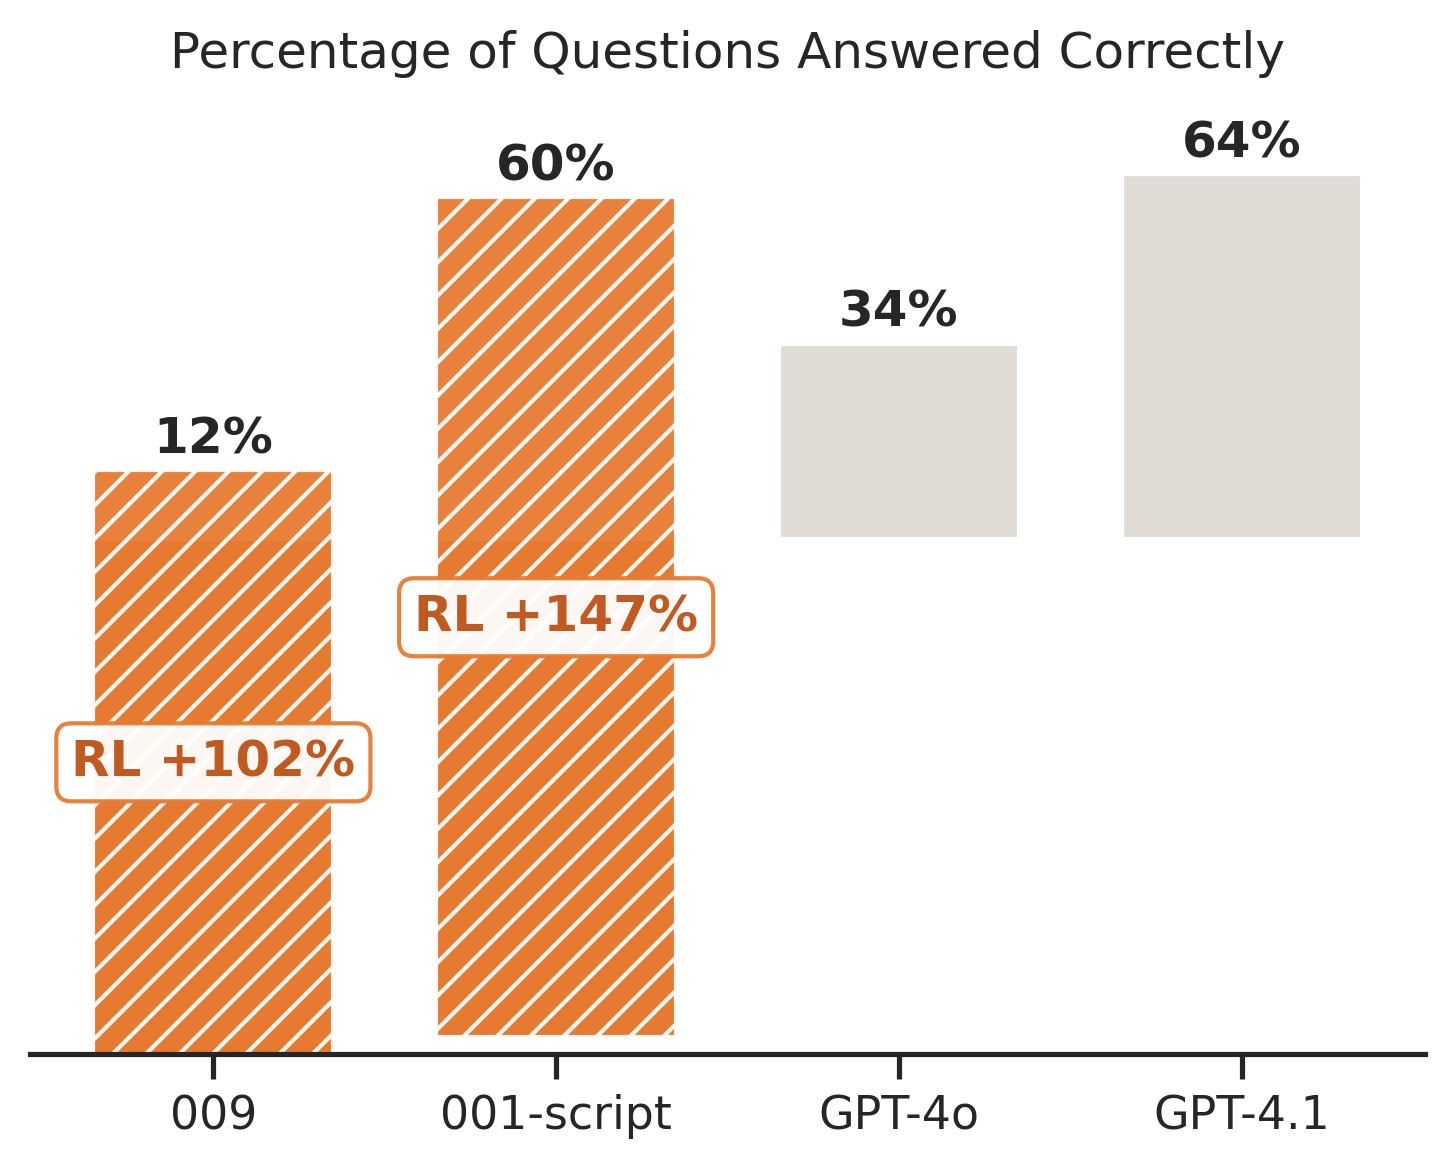

In [1]:
import importlib
import os
import polars as pl

from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.charts import percentage_comparison_bar_chart, training_progress_chart
import art.utils.benchmarking.charts
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.output_dirs import get_benchmarks_dir

importlib.reload(art.utils.benchmarking.charts)

project_name = "tic-tac-toe-local"

# await load_trajectories.bust_cache()
df = await load_trajectories(
    api_path="./.art",
    project_name=project_name,
    models=["009", "001-script", "gpt-4o", "gpt-4.1"],
    debug=True,
)  # type: ignore


# Create the first chart (bar chart)
fig1 = percentage_comparison_bar_chart(
    df,
    metric_name="reward",
    models=[
        BenchmarkModelKey("009", "009", "train"),
        BenchmarkModelKey("001-script", "001-script", "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
    ],
    title="Percentage of Questions Answered Correctly",
)



benchmarks_dir = get_benchmarks_dir(project=project_name, path="./.art")

os.makedirs(benchmarks_dir, exist_ok=True)

fig1.savefig(f"{benchmarks_dir}/accuracy-comparison.svg")


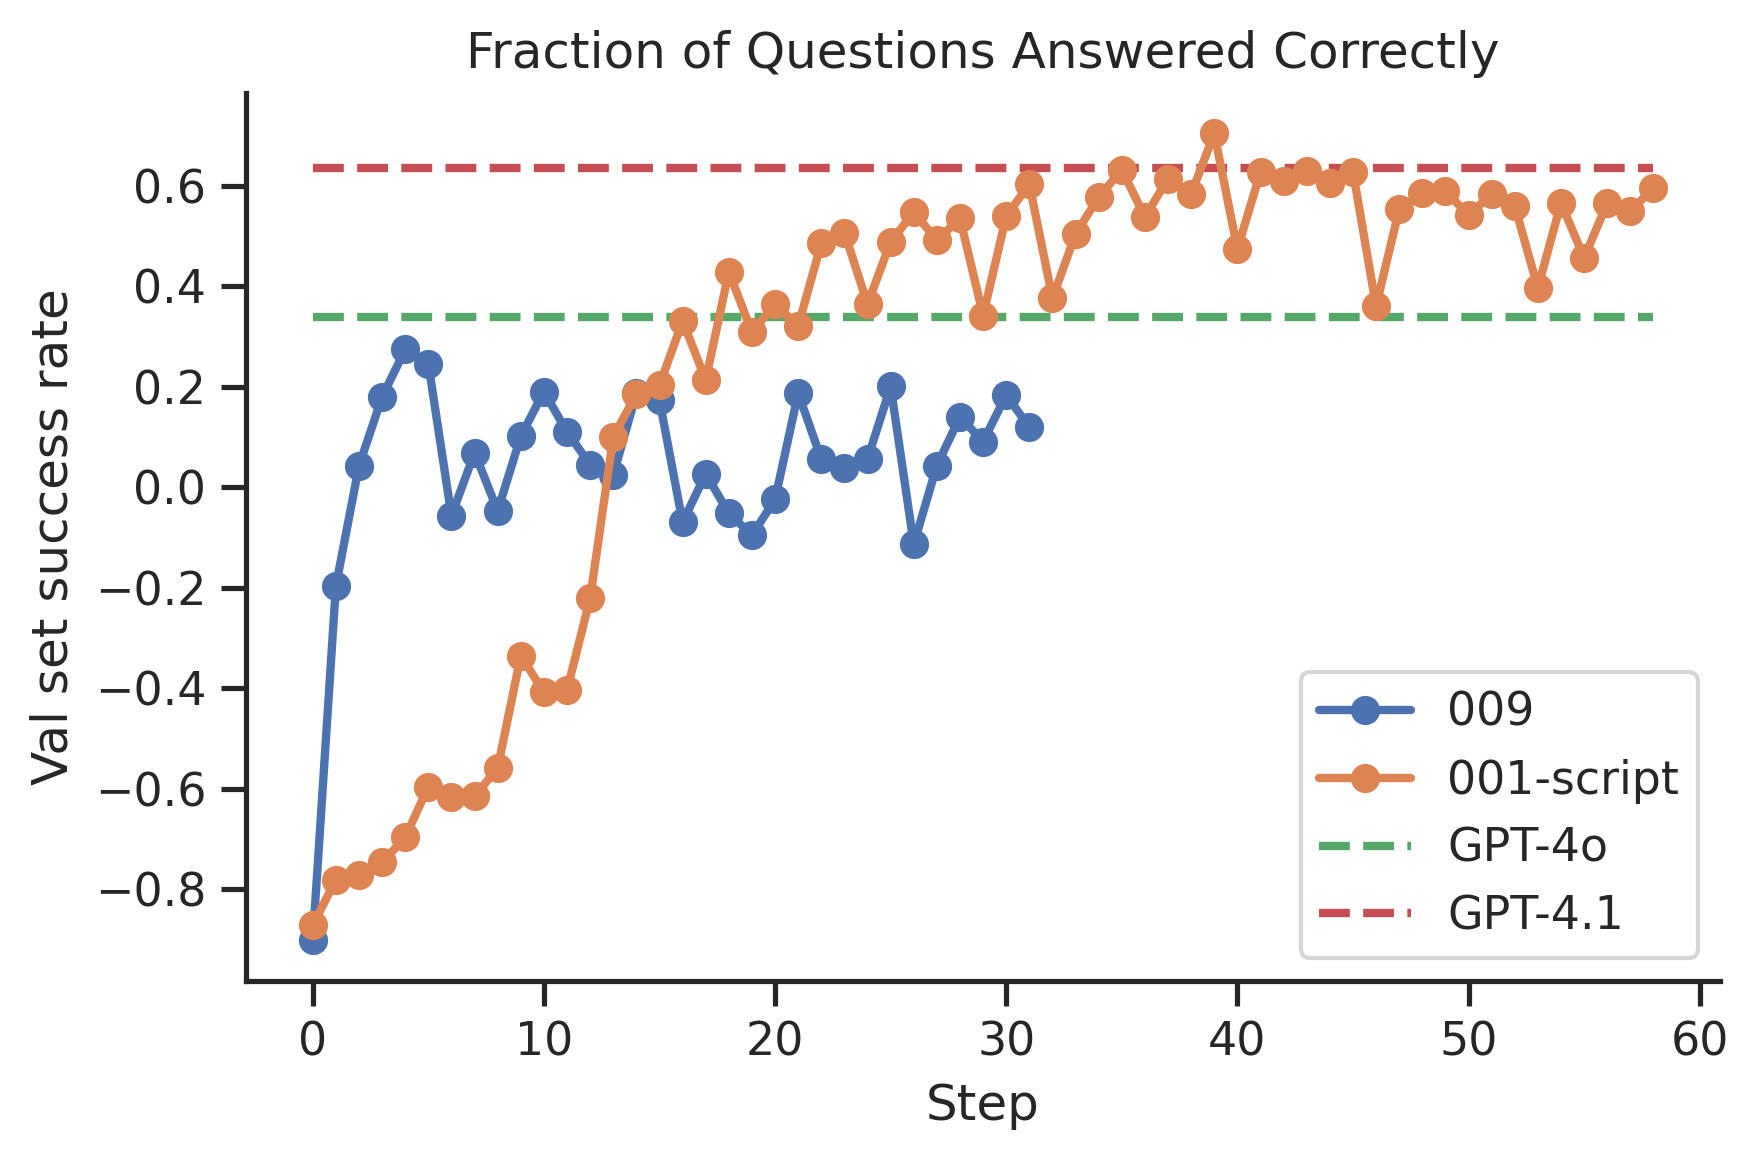

In [2]:
# Create the second chart (line chart)
fig2 = training_progress_chart(
    df.filter(pl.col("step").ne(592)),
    "reward",
    models=[
        BenchmarkModelKey("009", "009", "train"),
        BenchmarkModelKey("001-script", "001-script", "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
    ],
    title="Fraction of Questions Answered Correctly",
    y_label="Val set success rate",
)
# Save the second chart using the helper
fig2.savefig(f"{benchmarks_dir}/accuracy-training-progress.svg")
